# Лабораторная работа Logistic map
## Easy level

Для работы будет использоваться Python с библиотеками numpy для вычислений и matplotlib для графического представления.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

## Точечное изображение и логистическое отображение

Точечная динамическая система задается рекуррентным соотношением 
$$
\vec x_{n+1} = \vec f(\vec x_n)
$$

Будем рассматривать одномерное логистическое отображение
$$
x_{n+1} = rx_n(1-x_n)
$$

In [16]:
def logistic_map(x, r):
	"""
	Функция одномерного логистического отображения.
	x: x_n
	r: параметр
	возвращаемое значение: x_{n+1}
	"""
	return r * x * (1 - x)

**Утверждение**
$$\forall n \in \N, \ \forall r \in (0;1]: \ \ 0 < x_0 < 1 \Rarr 0 < x_n < 0$$

**Доказательство**\
Докажем индукцией по $n$\
**База.** $0 < x_0 < 1$ (Верно для $n=0$)\
**Переход.** Пусть для некоторого $n \in \N$ выполнено $0 < x_n < 1$. Покажем, что отсюда следует $0 < x_{n+1} < 1$

По определению логистического отображения:
$$x_{n+1} = rx_n(1-x_n)$$
Докажем положительность и ограниченность сверху единицей:
1. **Положительность $x_{n+1}$:**\
Из индукционного предположения следует, что $x_n > 0, \ 1 - x_n > 0$\
Из условия: $r > 0$\
Т.е. все множители положительны, следовательно:
$$x_{n+1} = rx_n(1-x_n)>0$$
2. **Оценка сверху:**\
Рассмотрим функцию $g(x) = x(1-x)$.\
Заметим, что это квадратичная парабола, ветви которой направлены вниз ($g(x) = x - x^2$).\
Найдем максимум функции. Производная $g'(x) = 1 - 2x$, найдем критическую точку:$$g'(x) = 0 \Rarr 1 - 2x = 0 \Rarr x = \frac{1}{2}$$\
Вычислим значении функции в этой точке:$$g(\frac{1}{2}) = \frac{1}{2}(1 - \frac{1}{2}) = \frac{1}{2} \cdot \frac{1}{2} = \frac{1}{4}$$\
Т.к. парабола направлена ветвями вниз, то в точке $\frac{1}{2}$ достигается глобальный максимум функции $g(x)$.\
Следовательно, для любого $x \in (0, 1)$ выполняется: $$x(1-x) \le g(\frac{1}{2}) = \frac{1}{4} < 1$$

Положительность и ограниченность сверху доказаны, следовательно: $$0 < x_n < 1$$
**Утверждение доказано**

### График функции $x_{n+1} = f_r(x_n)$ для разных $r$

Рассматривается функция перехода (зависимости $x_{n+1}$ от $x_n$): $$x_{n+1} = f_r(x_n) = rx_n (1 - x_n)$$

Построим графики при нескольких значениях параметра $r$ и проанализируем полученные данные.

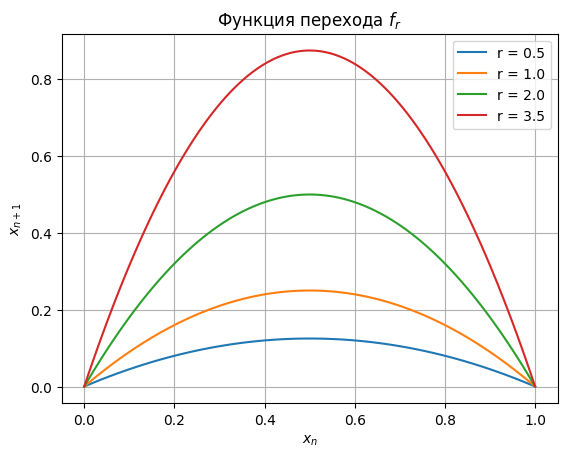

In [34]:
xs = np.linspace(0, 1, 100)
r_vars = [0.5, 1.0, 2.0, 3.5]

plt.figure()
for r in r_vars:
    ys = logistic_map(xs, r)
    plt.plot(xs, ys, label=f"r = {r}")

plt.xlabel("$x_n$")
plt.ylabel("$x_{n+1}$")
plt.legend()
plt.grid(True)
plt.title("Функция перехода $f_r$")
plt.show()


График $f_r$ представляет собой параболу с ветвями вниз, проходящую через точки $(0,0)$ и $(1,0)$ с вершиной в точке $\left(\frac12, \frac{r}{4}\right)$

При увеличении параметра $r$:
- Высота вершины $\frac{r}{4}$ возрастает линейно
- Парабола становится "круче" 

### Построение графика и анализ функции $g(x_{n+1})$

Рассматриваем функцию перехода, исходя из варианта лабораторной работы ($465208\bmod 5 = 3$):
$$g(x_{n+1}) = rx_n(1-x_n)(3-x_n), \ \ r \in [0; \frac{27}{2(7\sqrt{7}-10)}]$$

In [18]:
def g_map(x, r):
	"""
	Функция перехода g_{n+1}
	x: x_n
	r: параметр
	возвращаемое значение: x_{n+1}
	"""
	return r * x * (1 - x) * (3 - x)

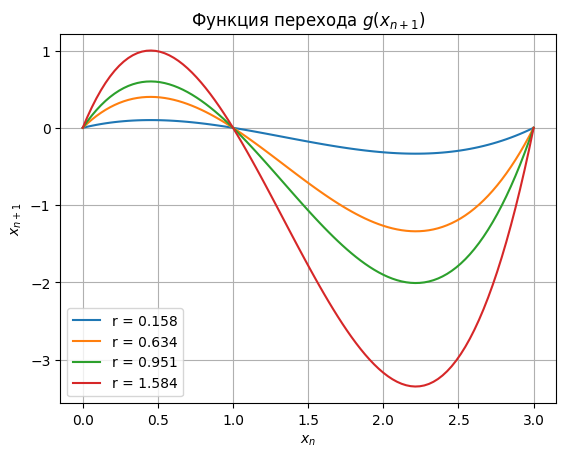

In [36]:
xs = np.linspace(0, 3, 100)
r_max = 27 / (2 * (7*np.sqrt(7) - 10)) 
r_values = [0.1 * r_max, 0.4 * r_max, 0.6 * r_max, r_max] # Для удобства беру различные значения параметра r как процент от верхней границы отрезка

plt.figure()
for r in r_values:
    ys = g_map(xs, r)
    plt.plot(xs, ys, label=f"r = {r:.3f}")
    
plt.xlabel("$x_n$")
plt.ylabel("$x_{n+1}$")
plt.title("Функция перехода $g(x_{n+1})$")
plt.grid(True)
plt.legend()
plt.show()

#### Сравнение с логистическим отображением

Функция $g(x)$ имеет дополнительный множитель $(3 - x)$, который и приводит к разнице в графиках функций:
- Число критических точек увеличилось до двух
- График $g(x)$ асимметричен
- При больших $x$ убывание становится "быстрее"
- При малых $x$ рост усиливается засчет доп. множителя $(3 - x \approx 3)$

Таким образом доп. множитель делает поведение функции сложнее, чем в случае логистического отображения